<h1><center>Lending Club EDA</center></h1>

<h2><center>Introduction</center></h2>


Lending Club is the world's largest peer-to-peer lending platform. They offer lending services by connecting borrowers with investors through an online marketplace. While this has become a popular source of passive income for investors, there is also a risk of default, in which the borrowers fall behind on their repayments. In this kernel, we will perform some explorations and feature analysis on the loan data provided by Lending Club to identify the potential risk factors associated with a loan default.

<h2><center>Getting Started</center></h2>

Lets import all the required libraries and take a look at the data

In [1]:
# Importing all libraries required.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings due to version problems
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read CSV file and check and load the data set for further analysis 
loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Observation from the first 5 rows

1. There are 111 colums and not all columns are visible
2. We can see that there are many missing values and we need to handle them
3. Not all rows might be required for our analysis and we might drop a few columns
4. There are some additional data like('%', 'months'...) added to the rows, we need to clean the data and also if required create derivative columns

### Lets look at all the columns and shape of the dataset before dropping rows/columns

In [3]:
# shape of dataset
loan.shape

(39717, 111)

In [4]:
#so we have total 39717 entries of loan and 111 coloumns defining the details of a particular loan 
# Lets check the info about the dataframe we will also print all the coloumns to check there dtypes 
#and see if we need to change any coloumns dtype
loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

In [5]:
# There are some columns with not so relevant column names which are useful in better understanding.
loan = loan.rename(columns = {'loan_amnt' : 'loan_amount', 'funded_amnt' : 'funded_amount', 'int_rate' : 'interest_rate', 'annual_inc' : 'annual_income', 'total_pymnt' : 'total_payment'})

<h2><center>Lets clean the dataset</center></h2>

### Remove additional values

In [6]:
# remove 'months' from terms column, convert it to integer and rename the column to terms_in_months
loan['term'] = loan['term'].str.replace(' months', '').astype(int)

# rename the column
loan.rename(columns={'term': 'terms_in_months'}, inplace=True)

In [7]:
# same goes for interest_rate column
loan['interest_rate'] = loan['interest_rate'].str.replace('%', '').astype(float)

## Identify and handle missing values

### Check and remove any duplicate Row

In [8]:
loan.duplicated().sum()

0

Looks like there are no duplicates

### Check for missing values

In [9]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amount                       0
funded_amount                     0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

### Observation

1. Some of the columns have all the null values and looks like these coluns might not be needed

In [10]:
#calculate the percentage of null values in a columns and print the column have percentage more then 60 
# as null values can impact the data analysis
nullValuePercentage= round((loan.isnull().sum()/len(loan))*100,2)
nullValuePercentage[nullValuePercentage>60].sort_values(ascending=False)

mo_sin_old_il_acct                100.00
mo_sin_old_rev_tl_op              100.00
mo_sin_rcnt_tl                    100.00
mort_acc                          100.00
mths_since_recent_bc              100.00
mths_since_recent_bc_dlq          100.00
mths_since_recent_inq             100.00
mths_since_recent_revol_delinq    100.00
num_accts_ever_120_pd             100.00
num_actv_bc_tl                    100.00
num_actv_rev_tl                   100.00
num_bc_sats                       100.00
num_bc_tl                         100.00
num_il_tl                         100.00
num_op_rev_tl                     100.00
num_rev_accts                     100.00
num_rev_tl_bal_gt_0               100.00
num_sats                          100.00
num_tl_120dpd_2m                  100.00
num_tl_30dpd                      100.00
num_tl_90g_dpd_24m                100.00
num_tl_op_past_12m                100.00
pct_tl_nvr_dlq                    100.00
percent_bc_gt_75                  100.00
tot_hi_cred_lim 

1. From the above we see that there are quite a few columns which are completely null and these might not add any additional insights.
2. Lets drop these columns and also drop the columns and also drop columns where null value percentage is greater than 60

In [11]:
#removing the columns having more than 60% of null value
loan = loan.loc[:,(loan.isnull().sum()/len(loan)*100)<60]

loan.shape

(39717, 54)

Looks like almost half of the columns have been dropped which contains null values greater than 60 percent

Lets further analyse the column and check their importance and decide if they are useful for our analysis else drop those columns

In [12]:
# again check the percentage of null value in the coloumns 
print(round((loan.isnull().sum()/len(loan))*100,2).sort_values(ascending=False))

desc                          32.59
emp_title                      6.19
emp_length                     2.71
pub_rec_bankruptcies           1.75
last_pymnt_d                   0.18
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
revol_util                     0.13
tax_liens                      0.10
title                          0.03
last_credit_pull_d             0.01
total_rec_prncp                0.00
out_prncp                      0.00
initial_list_status            0.00
out_prncp_inv                  0.00
total_acc                      0.00
total_payment                  0.00
total_pymnt_inv                0.00
collection_recovery_fee        0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
recoveries                     0.00
pub_rec                        0.00
last_pymnt_amnt                0.00
policy_code                    0.00
application_type               0.00
acc_now_delinq                 0.00
delinq_amnt                 

In [13]:
# # There are few more columns which doesnt add any value like the last 3 digits of a zip_code, description and Title are very similar, id, member_id, url .... Lets drop these columns
# loan.drop( ['id', 'member_id', 'emp_title', 'collection_recovery_fee','url', 'desc',
#             'title','zip_code','inq_last_6mths','collection_recovery_fee',
#             'recoveries','tax_liens','total_rec_late_fee','policy_code','last_pymnt_d',
#             'earliest_cr_line','total_rec_int','total_rec_prncp','delinq_2yrs', 'open_acc', 'pub_rec', 'total_acc', 'last_pymnt_amnt','total_pymnt_inv','total_pymnt', 'chargeoff_within_12_mths','collections_12_mths_ex_med','revol_util','revol_bal','last_credit_pull_d'],axis=1,inplace=True)

In [16]:
def analyze_outliers(dataframe, column_name):
    """
    Generates a boxplot for the specified column and displays statistical details.
    
    Parameters:
    - dataframe (pd.DataFrame): The DataFrame containing the data.
    - column_name (str): The name of the column to analyze.

    Returns:
    - None; outputs a boxplot and prints statistical details of the column.
    """
    if column_name in dataframe.columns:
        # Generate boxplot
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=dataframe[column_name])
        plt.title(f'Boxplot for {column_name}')
        plt.grid(True)
        plt.show()

        # Calculate and display statistics
        stats = dataframe[column_name].describe()
        additional_stats = pd.Series({
            'mean': dataframe[column_name].mean(),
            'std_dev': dataframe[column_name].std(),
            'variance': dataframe[column_name].var()
        })
        
        # Using concat to combine the statistics
        all_stats = pd.concat([stats, additional_stats])
        print("\nStatistical Details:")
        print(all_stats)
    else:
        print("Column name provided does not exist in the dataframe.")

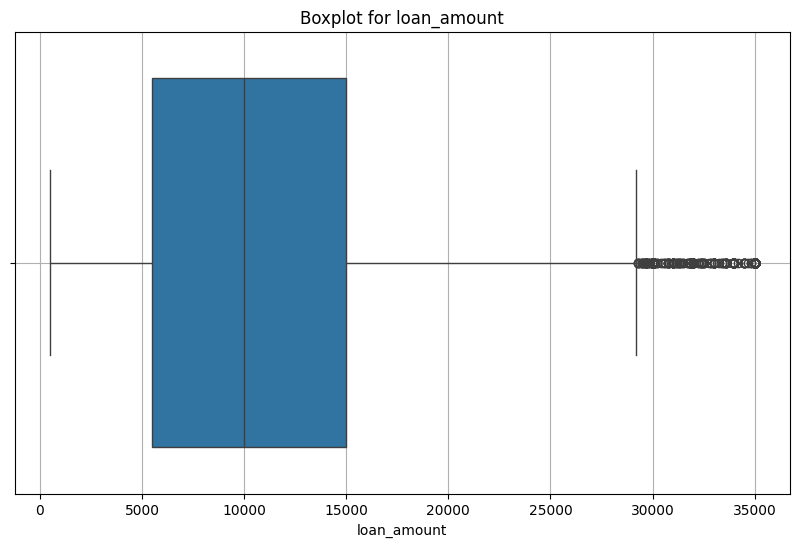


Statistical Details:
count       3.971700e+04
mean        1.121944e+04
std         7.456671e+03
min         5.000000e+02
25%         5.500000e+03
50%         1.000000e+04
75%         1.500000e+04
max         3.500000e+04
mean        1.121944e+04
std_dev     7.456671e+03
variance    5.560194e+07
dtype: float64


In [17]:
analyze_outliers(loan, 'loan_amount')

In [37]:
def analyze_outliers(dataframe, column_name):
    if column_name in dataframe.columns:
        # Create a boxplot to visualize outliers
        fig, ax = plt.subplots(figsize=(10, 6))
        sns.boxplot(x=dataframe[column_name], ax=ax)
        plt.grid(True)
        plt.title(f'Boxplot for {column_name}')
        plt.show()

        # Compute basic statistics
        stats = dataframe[column_name].describe()

        # Compute additional statistics
        additional_stats = pd.Series({
            'mean': dataframe[column_name].mean(),
            'std_dev': dataframe[column_name].std(),
            'variance': dataframe[column_name].var()
        })

        # Combine all statistics
        all_stats = pd.concat([stats, additional_stats])

        # Format all statistics for human-readable output
        readable_stats = {key: f"{value:,.2f}" for key, value in all_stats.items()}

        # Print the formatted statistics
        print("\nStatistical Details:")
        for key, value in readable_stats.items():
            print(f"{key.capitalize()}: {value}")

    else:
        print("Column name provided does not exist in the dataframe.")

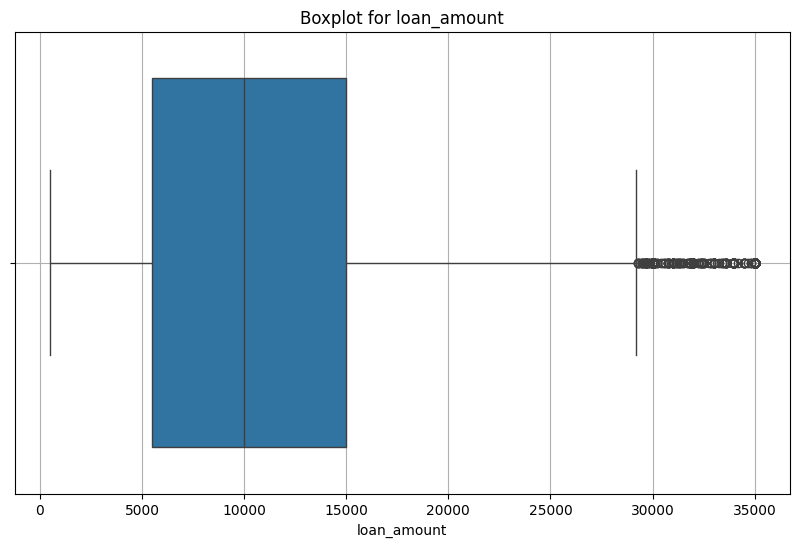


Statistical Details:
Count: 39,717.00
Mean: 11,219.44
Std: 7,456.67
Min: 500.00
25%: 5,500.00
50%: 10,000.00
75%: 15,000.00
Max: 35,000.00
Std_dev: 7,456.67
Variance: 55,601,937.84


In [38]:
analyze_outliers(loan, 'loan_amount')

## Observations:

1. There are few points which lie outside of the IQR but these look like continous values and wide range.

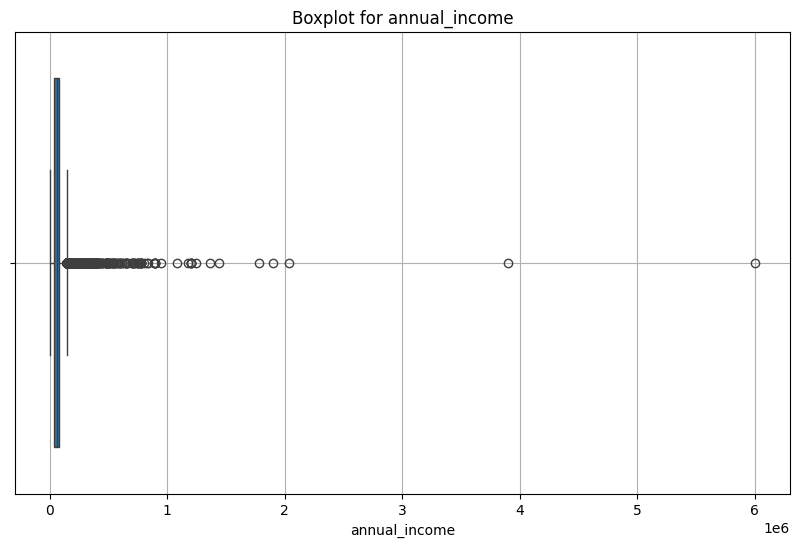


Statistical Details:
Count: 39,717.00
Mean: 68,968.93
Std: 63,793.77
Min: 4,000.00
25%: 40,404.00
50%: 59,000.00
75%: 82,300.00
Max: 6,000,000.00
Std_dev: 63,793.77
Variance: 4,069,644,553.68


In [39]:
analyze_outliers(loan, 'annual_income')

## Observations:

1. From the above graph, you can see there are few points which are extreme right and far away from the IQR range.
2. To have meaningful insights, we will go ahead and drop the data points which are greater than 95 percentile as these points are considerd outliers.
3. Lets remove the outliers are then plot the box again

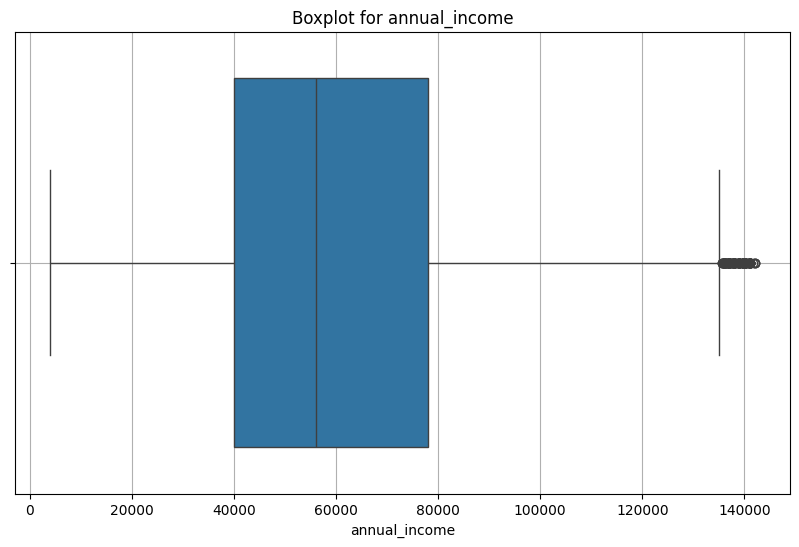


Statistical Details:
Count: 37,730.00
Mean: 61,043.98
Std: 27,795.21
Min: 4,000.00
25%: 40,000.00
50%: 56,000.00
75%: 78,000.00
Max: 141,996.00
Std_dev: 27,795.21
Variance: 772,573,774.68


In [40]:
# remove outliers and box plot again
loan = loan[loan['annual_income'] < loan['annual_income'].quantile(0.95)]

analyze_outliers(loan, 'annual_income')

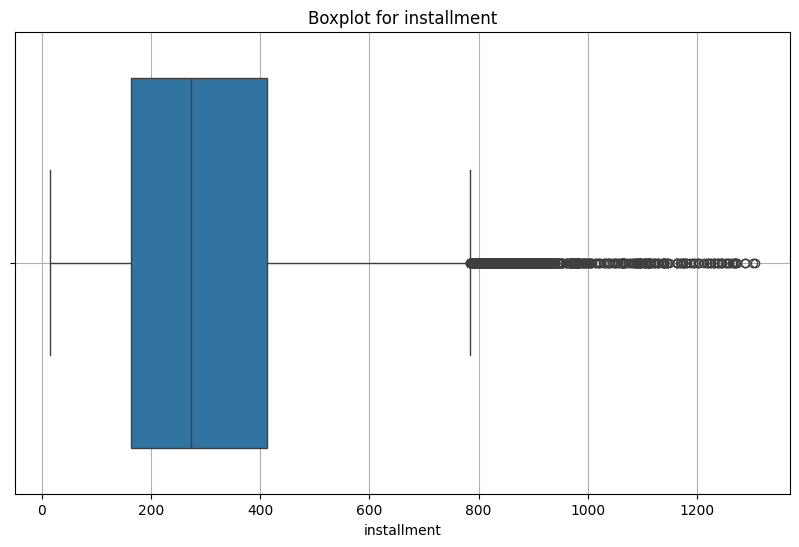


Statistical Details:
Count: 37,730.00
Mean: 313.85
Std: 199.48
Min: 15.69
25%: 163.96
50%: 273.10
75%: 412.05
Max: 1,305.19
Std_dev: 199.48
Variance: 39,793.43


In [41]:
analyze_outliers(loan, 'installment')

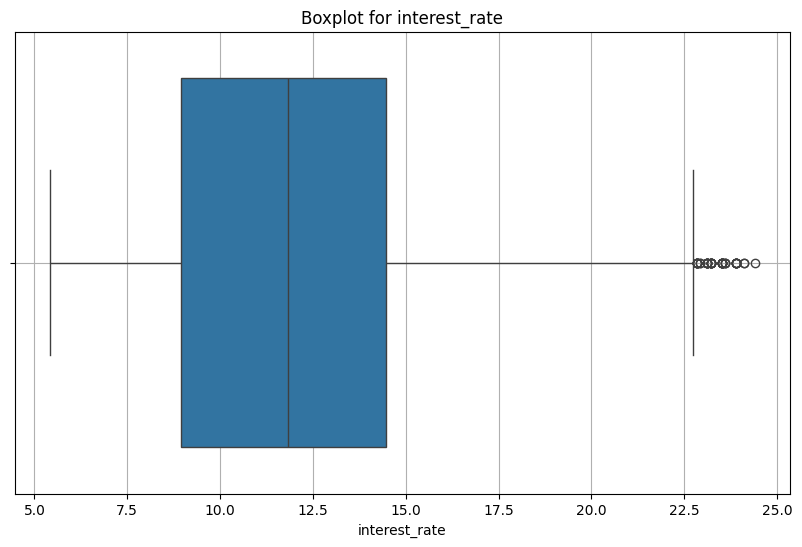


Statistical Details:
Count: 37,730.00
Mean: 11.97
Std: 3.70
Min: 5.42
25%: 8.94
50%: 11.83
75%: 14.46
Max: 24.40
Std_dev: 3.70
Variance: 13.67


In [42]:
analyze_outliers(loan, 'interest_rate')